<a href="https://colab.research.google.com/github/brendampa/DesafioTelecom_Parte2/blob/main/Desafio_TelecomX_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extração e leitura do DataFrame

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/brendampa/DesafioTelecom_Parte2/refs/heads/main/dados_tratados.csv')

In [ ]:
dados.head()

,ClienteID,Churn,Genero,Idoso,Parceiro,Dependentes,Tempo_contrato,Servico_Telefone,Multiplas_linhas,Servico_internet,...,Protecao_device,Suporte_internet,Streaming_tv,Streaming_filme,Contrato,Fatura_online,Metodo_pagamento,Fatura_mensal,Fatura_anual,Contas_diarias
0,0002-orfbo,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.796667


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ClienteID         7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   Genero            7267 non-null   object 
 3   Idoso             7267 non-null   int64  
 4   Parceiro          7267 non-null   int64  
 5   Dependentes       7267 non-null   int64  
 6   Tempo_contrato    7267 non-null   int64  
 7   Servico_Telefone  7267 non-null   int64  
 8   Multiplas_linhas  7267 non-null   object 
 9   Servico_internet  7267 non-null   object 
 10  Seguranca_online  7267 non-null   object 
 11  Backup_online     7267 non-null   object 
 12  Protecao_device   7267 non-null   object 
 13  Suporte_internet  7267 non-null   object 
 14  Streaming_tv      7267 non-null   object 
 15  Streaming_filme   7267 non-null   object 
 16  Contrato          7267 non-null   object 


In [ ]:
dados.shape

(7267, 22)

#Preparação dos Dados

##Remoção de variáveis que não agregam valor ao modelo

In [ ]:
#Removendo a coluna ClienteID para não prejudicar o desempenho do modelo
dados = dados.drop('ClienteID', axis=1)

In [ ]:
dados.head()

,Churn,Genero,Idoso,Parceiro,Dependentes,Tempo_contrato,Servico_Telefone,Multiplas_linhas,Servico_internet,Seguranca_online,...,Protecao_device,Suporte_internet,Streaming_tv,Streaming_filme,Contrato,Fatura_online,Metodo_pagamento,Fatura_mensal,Fatura_anual,Contas_diarias
0,0,female,0,1,1,9,1,0,dsl,0,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.186667
1,0,male,0,0,0,9,1,1,dsl,0,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.996667
2,1,male,0,0,0,4,1,0,fiber optic,0,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,1,male,1,1,0,13,1,0,fiber optic,0,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,1,female,1,1,0,3,1,0,fiber optic,0,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.796667


In [ ]:
dados_tratados = dados.copy()

In [ ]:
#Verificando o conteúdo das colunas

colunas = dados_tratados.columns.tolist()
for coluna in colunas:
  if dados_tratados[coluna].dtype == 'object':
    print(f'Coluna {coluna}: {dados_tratados[coluna].unique()}')

Coluna Genero: ['female' 'male']
Coluna Multiplas_linhas: ['0' '1' 'no phone service']
Coluna Servico_internet: ['dsl' 'fiber optic' 'no']
Coluna Seguranca_online: ['0' '1' 'no internet service']
Coluna Backup_online: ['1' '0' 'no internet service']
Coluna Protecao_device: ['0' '1' 'no internet service']
Coluna Suporte_internet: ['1' '0' 'no internet service']
Coluna Streaming_tv: ['1' '0' 'no internet service']
Coluna Streaming_filme: ['0' '1' 'no internet service']
Coluna Contrato: ['one year' 'month-to-month' 'two year']
Coluna Metodo_pagamento: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


In [ ]:
#substituindo os valores de 'no internet service' por 'no'
servicos_internet = ['Seguranca_online', 'Backup_online', 'Protecao_device',
    'Suporte_internet', 'Streaming_tv', 'Streaming_filme']

for servico in servicos_internet:
  dados_tratados[servico] = dados_tratados[servico].replace({'no internet service': '0'})

In [ ]:
#substituindo os valores de 'no phone service' por 'no'
dados_tratados['Multiplas_linhas'] = dados_tratados['Multiplas_linhas'].replace({'no phone service': '0'})

In [ ]:
#Verificando novamente o conteúdo das colunas

colunas = dados_tratados.columns.tolist()
for coluna in colunas:
  if dados_tratados[coluna].dtype == 'object':
    print(f'Coluna {coluna}: {dados_tratados[coluna].unique()}')

Coluna Genero: ['female' 'male']
Coluna Multiplas_linhas: ['0' '1']
Coluna Servico_internet: ['dsl' 'fiber optic' 'no']
Coluna Seguranca_online: ['0' '1']
Coluna Backup_online: ['1' '0']
Coluna Protecao_device: ['0' '1']
Coluna Suporte_internet: ['1' '0']
Coluna Streaming_tv: ['1' '0']
Coluna Streaming_filme: ['0' '1']
Coluna Contrato: ['one year' 'month-to-month' 'two year']
Coluna Metodo_pagamento: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


In [ ]:
#Verificando se tem linhas com NaN
colunas_com_nan = dados_tratados.columns[dados_tratados.isnull().any()].tolist()

for coluna in colunas_com_nan:
    qtd_nan = dados_tratados[coluna].isnull().sum()
    print(f'Coluna {coluna} possui {qtd_nan} linha(s) com NaN')

Coluna Fatura_anual possui 11 linha(s) com NaN


In [ ]:
#Removendo linhas com NaN

dados_tratados = dados_tratados.dropna()

In [ ]:
#Verificando se tem linhas com NaN
colunas_com_nan = dados_tratados.columns[dados_tratados.isnull().any()].tolist()

for coluna in colunas_com_nan:
    qtd_nan = dados_tratados[coluna].isnull().sum()
    print(f'Coluna {coluna} possui {qtd_nan} linha(s) com NaN')

##Encoding
Transforme as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilize um método de codificação adequado, como o one-hot encoding.

In [ ]:
#Transformando as variáveis categóricas de texto para numérico com pandas

colunas_categoricas = ['Genero','Servico_internet','Contrato','Metodo_pagamento']

dados_tratados = pd.get_dummies(data=dados_tratados, columns=colunas_categoricas, dtype=int)
dados_tratados.head()

,Churn,Idoso,Parceiro,Dependentes,Tempo_contrato,Servico_Telefone,Multiplas_linhas,Seguranca_online,Backup_online,Protecao_device,...,Servico_internet_dsl,Servico_internet_fiber optic,Servico_internet_no,Contrato_month-to-month,Contrato_one year,Contrato_two year,Metodo_pagamento_bank transfer (automatic),Metodo_pagamento_credit card (automatic),Metodo_pagamento_electronic check,Metodo_pagamento_mailed check
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Churn                                       7256 non-null   int64  
 1   Idoso                                       7256 non-null   int64  
 2   Parceiro                                    7256 non-null   int64  
 3   Dependentes                                 7256 non-null   int64  
 4   Tempo_contrato                              7256 non-null   int64  
 5   Servico_Telefone                            7256 non-null   int64  
 6   Multiplas_linhas                            7256 non-null   object 
 7   Seguranca_online                            7256 non-null   object 
 8   Backup_online                               7256 non-null   object 
 9   Protecao_device                             7256 non-null   object 
 10  Suporte_internet 

##Proporção de Churn

In [ ]:
dados_tratados['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.74242
1,0.25758


##Matriz de Correlação

In [ ]:
dados_tratados.head()

,Churn,Idoso,Parceiro,Dependentes,Tempo_contrato,Servico_Telefone,Multiplas_linhas,Seguranca_online,Backup_online,Protecao_device,...,Servico_internet_dsl,Servico_internet_fiber optic,Servico_internet_no,Contrato_month-to-month,Contrato_one year,Contrato_two year,Metodo_pagamento_bank transfer (automatic),Metodo_pagamento_credit card (automatic),Metodo_pagamento_electronic check,Metodo_pagamento_mailed check
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
dados_tratados.corr().round(4).sort_values(by='Churn', ascending=False)

,Churn,Idoso,Parceiro,Dependentes,Tempo_contrato,Servico_Telefone,Multiplas_linhas,Seguranca_online,Backup_online,Protecao_device,...,Servico_internet_dsl,Servico_internet_fiber optic,Servico_internet_no,Contrato_month-to-month,Contrato_one year,Contrato_two year,Metodo_pagamento_bank transfer (automatic),Metodo_pagamento_credit card (automatic),Metodo_pagamento_electronic check,Metodo_pagamento_mailed check
Churn,1.0000,0.1464,-0.1481,-0.1603,-0.3458,0.0123,0.0393,-0.1669,-0.0802,-0.0635,...,-0.1199,0.3004,-0.2238,0.3951,-0.1743,-0.2945,-0.1150,-0.1314,0.2942,-0.0892
Contrato_month-to-month,0.3951,0.1363,-0.2772,-0.2286,-0.6508,-0.0027,-0.0901,-0.2452,-0.1650,-0.2258,...,-0.0640,0.2422,-0.2180,1.0000,-0.5709,-0.6217,-0.1796,-0.2074,0.3315,0.0069
Servico_internet_fiber optic,0.3004,0.2549,0.0036,-0.1664,0.0191,0.2912,0.3675,-0.0277,0.1666,0.1783,...,-0.6403,1.0000,-0.4674,0.2422,-0.0744,-0.2115,-0.0258,-0.0510,0.3391,-0.3064
Metodo_pagamento_electronic check,0.2942,0.1703,-0.0790,-0.1504,-0.2088,0.0045,0.0859,-0.1109,0.0010,-0.0000,...,-0.1049,0.3391,-0.2877,0.3315,-0.1093,-0.2824,-0.3772,-0.3741,1.0000,-0.3878
Fatura_mensal,0.1894,0.2201,0.0981,-0.1143,0.2470,0.2473,0.4912,0.2982,0.4427,0.4835,...,-0.1619,0.7886,-0.7634,0.0586,0.0087,-0.0766,0.0381,0.0311,0.2751,-0.3778
Contas_diarias,0.1894,0.2201,0.0981,-0.1143,0.2470,0.2473,0.4912,0.2982,0.4427,0.4835,...,-0.1619,0.7886,-0.7634,0.0586,0.0087,-0.0766,0.0381,0.0311,0.2751,-0.3778
Fatura_online,0.1863,0.1575,-0.0103,-0.1105,0.0067,0.0138,0.1634,-0.0021,0.1315,0.1055,...,-0.0610,0.3274,-0.3241,0.1671,-0.0512,-0.1460,-0.0185,-0.0118,0.2086,-0.2051
Idoso,0.1464,1.0000,0.0234,-0.2123,0.0173,0.0099,0.1446,-0.0379,0.0689,0.0604,...,-0.1081,0.2549,-0.1825,0.1363,-0.0471,-0.1141,-0.0158,-0.0229,0.1703,-0.1537
Streaming_tv,0.0625,0.1037,0.1246,-0.0150,0.2812,-0.0242,0.2580,0.1767,0.2827,0.3935,...,0.0159,0.3300,-0.4157,-0.1121,0.0635,0.0702,0.0450,0.0422,0.1464,-0.2506
Streaming_filme,0.0601,0.1190,0.1164,-0.0388,0.2862,-0.0348,0.2597,0.1899,0.2768,0.4029,...,0.0237,0.3255,-0.4192,-0.1182,0.0682,0.0728,0.0474,0.0502,0.1391,-0.2526


##Análises direcionadas


In [ ]:
import plotly.express as px

In [ ]:
#Tempo de contrato × Evasão boxplot
px.box(dados_tratados, x='Tempo_contrato', color='Churn')

In [ ]:
#Fatura_mensal × Evasão com boxplot
px.box(dados_tratados, x='Fatura_mensal', color='Churn')

In [ ]:

#Contas_diarias × Evasão com boxplot
px.box(dados_tratados, x='Contas_diarias', color='Churn')

#Modelagem Preditiva

In [ ]:
#Criando variáveis explicativas e alvo

x = dados_tratados.drop('Churn', axis = 1) #Remoção do churn - variaveis explicativas

y = dados_tratados['Churn'] #variável alvo

In [ ]:
x

,Idoso,Parceiro,Dependentes,Tempo_contrato,Servico_Telefone,Multiplas_linhas,Seguranca_online,Backup_online,Protecao_device,Suporte_internet,...,Servico_internet_dsl,Servico_internet_fiber optic,Servico_internet_no,Contrato_month-to-month,Contrato_one year,Contrato_two year,Metodo_pagamento_bank transfer (automatic),Metodo_pagamento_credit card (automatic),Metodo_pagamento_electronic check,Metodo_pagamento_mailed check
0,0,1,1,9,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,9,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0,0,0,4,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3,1,1,0,13,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
4,1,1,0,3,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,13,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
7263,0,1,0,22,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7264,0,0,0,2,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
7265,0,1,1,67,1,0,1,0,1,1,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
y

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


#Oversample

In [ ]:
# Os dados estão com uma proporção muito diferente, para corrigir, iremos usar a técnica "Oversample" para balanceá-los.

from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)
y_balanceado.value_counts(normalize=True)

,proportion
Churn,
0,0.5
1,0.5


#Ajustando modelo - Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste =  train_test_split(x_balanceado,y_balanceado,test_size=0.3, stratify = y_balanceado ,random_state = 5) #30% para teste e 80% para treino

#Modelo RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_depth = 3, random_state = 5)

RFC.fit(x_treino, y_treino)
RFC.score(x_teste, y_teste)

0.801113516857408

##Modelo Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Inicializando o modelo
arvore = DecisionTreeClassifier(max_depth = 3,random_state = 5)
#Ajusta o modelo
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [ ]:
#Previsão de novos dados com os dados de teste
arvore.predict(x_teste)

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
#Avaliação de desempenho do modelo - 74% de acerto (acurácia)
arvore.score(x_teste, y_teste)

0.7974017939993814

In [ ]:
#Taxa de acerto
arvore.score(x_treino, y_treino)

0.7941917517570614

In [ ]:
colunas_x= x.columns.tolist()
colunas_x

['Idoso',
 'Parceiro',
 'Dependentes',
 'Tempo_contrato',
 'Servico_Telefone',
 'Multiplas_linhas',
 'Seguranca_online',
 'Backup_online',
 'Protecao_device',
 'Suporte_internet',
 'Streaming_tv',
 'Streaming_filme',
 'Fatura_online',
 'Fatura_mensal',
 'Fatura_anual',
 'Contas_diarias',
 'Genero_female',
 'Genero_male',
 'Servico_internet_dsl',
 'Servico_internet_fiber optic',
 'Servico_internet_no',
 'Contrato_month-to-month',
 'Contrato_one year',
 'Contrato_two year',
 'Metodo_pagamento_bank transfer (automatic)',
 'Metodo_pagamento_credit card (automatic)',
 'Metodo_pagamento_electronic check',
 'Metodo_pagamento_mailed check']

In [ ]:
#Gráfico

from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

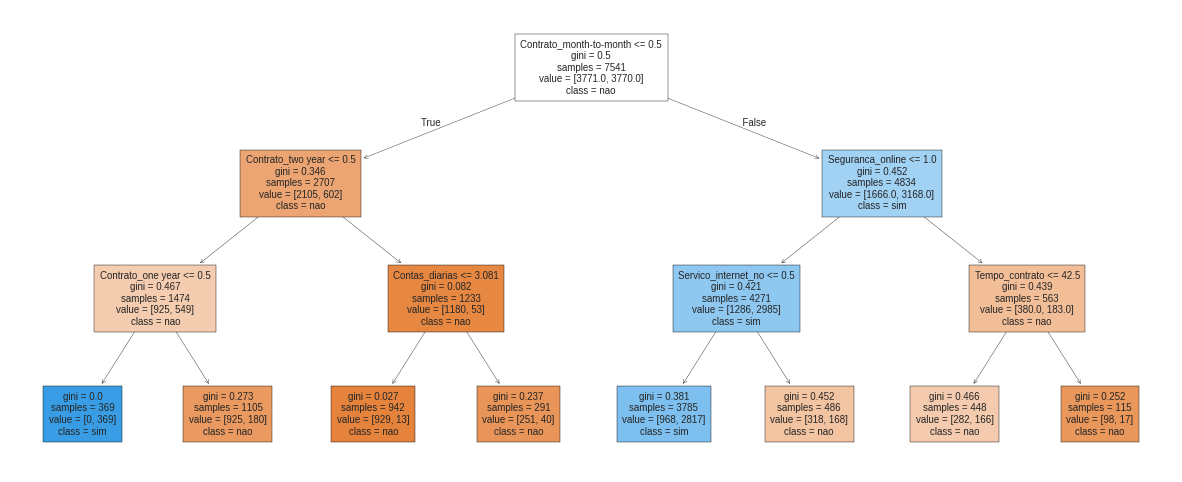

In [ ]:
#Plotaando o gráfico utilizando as colunas do dataframe X, ou seja, apenas as explicativas!
plt.figure(figsize = (15,6))
plot_tree(arvore,filled = True, class_names = ['nao','sim'], fontsize = 7, feature_names = colunas_x )
plt.show()

#Avaliação dos Modelos

##Acurácia

In [ ]:
print(f'Acurácia Árvore de Decisão: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia RFC: {RFC.score(x_teste, y_teste)}')


Acurácia Árvore de Decisão: 0.7974017939993814
Acurácia RFC: 0.801113516857408


##Matriz de confusão

###Modelo Árvore

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#Armazena a previsão para posterior comparação com dados reais (validação)
y_previsto = arvore.predict(x_teste)
matriz_confusao = confusion_matrix(y_teste, y_previsto)
print(matriz_confusao)

[[1212  404]
 [ 251 1366]]


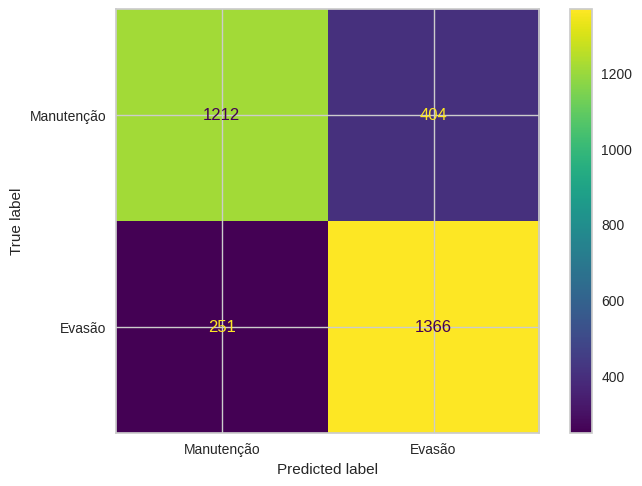

In [ ]:
#Melhorando a visualização da matriz
from sklearn.metrics import ConfusionMatrixDisplay

visualizacao = ConfusionMatrixDisplay(matriz_confusao,display_labels =['Manutenção','Evasão'])
visualizacao.plot();

De acordo com a matriz, o real de clientes com evasão é de 561 e o previsto foi de 412.

####Acurácia Geral

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(f'Acurácia: {accuracy_score(y_teste, y_previsto)}')

Acurácia: 0.7974017939993814


####Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print(f'Recall: {recall_score(y_teste, y_previsto)}')

Recall: 0.8447742733457019


####Precisão

In [ ]:
print(f'Precisão: {precision_score(y_teste, y_previsto)}')

Precisão: 0.7717514124293785


####F1-Score

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(f'F1-Score: {f1_score(y_teste,y_previsto)}')

F1-Score: 0.806613522291113


####Curva ROC

In [ ]:
from sklearn.metrics import RocCurveDisplay

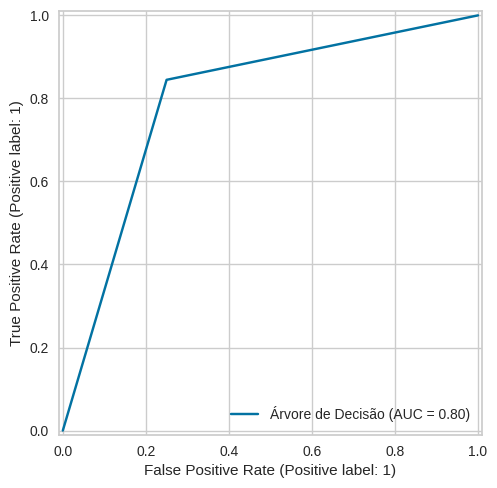

In [ ]:
RocCurveDisplay.from_predictions(y_teste, y_previsto, name='Árvore de Decisão');

#Quanto mais próximo de 0.5 pior, ou seja, diferencia pior os clientes com e sem evasão.

####Curva de Precisão x Recall

Em casos de base desbalanceada, esse curva é mrlhoe do que a ROC!

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

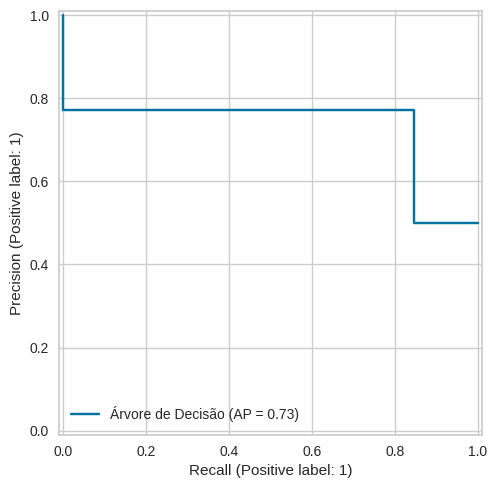

In [ ]:
PrecisionRecallDisplay.from_predictions(y_teste, y_previsto, name='Árvore de Decisão');

In [ ]:
#Extraindo a métrica AP
from sklearn.metrics import average_precision_score

In [ ]:
print(f'AP: {average_precision_score(y_teste, y_previsto)}')

#Para a métrica AP quanto mais próximo de 0 pior e quanto mais próximo de 1 melhor.

AP: 0.729592608418937


###Modelo RandomForestClassifier

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#Armazena a previsão para posterior comparação com dados reais (validação)
y_previsto_RFC = RFC.predict(x_teste)
matriz_confusao_RFC = confusion_matrix(y_teste, y_previsto_RFC)
print(matriz_confusao_RFC)

[[1148  468]
 [ 175 1442]]


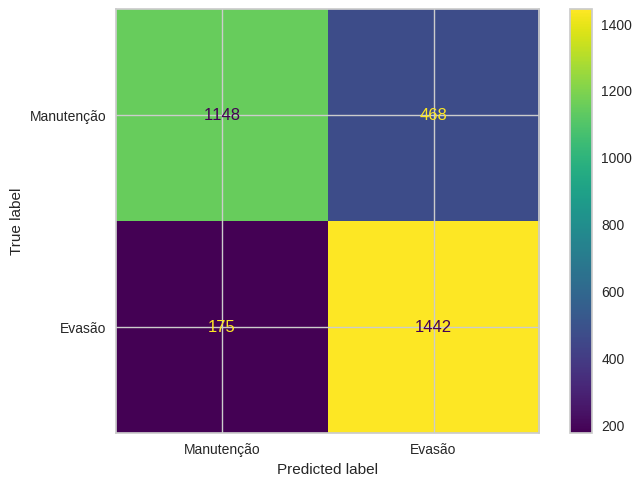

In [ ]:
#Melhorando a visualização da matriz
from sklearn.metrics import ConfusionMatrixDisplay

visualizacao_KFC = ConfusionMatrixDisplay(matriz_confusao_RFC,display_labels =['Manutenção','Evasão'])
visualizacao_KFC.plot();

#### Acurácia

In [ ]:
from sklearn.metrics import accuracy_score
print(f'Acurácia: {accuracy_score(y_teste, y_previsto_RFC)}')

Acurácia: 0.801113516857408


####Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(f'Recall: {recall_score(y_teste, y_previsto_RFC)}')

Recall: 0.8917748917748918


####Precisão

In [ ]:
print(f'Precisão: {precision_score(y_teste, y_previsto_RFC)}')

Precisão: 0.7549738219895288


####F1-Score

In [ ]:
from sklearn.metrics import f1_score
print(f'F1-Score: {f1_score(y_teste,y_previsto_RFC)}')

F1-Score: 0.8176920895945563


####Curva ROC

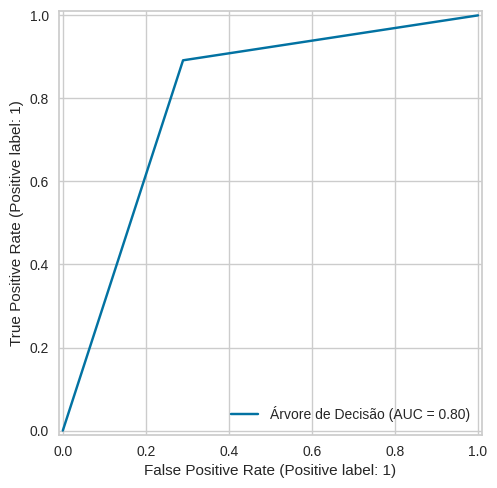

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_teste, y_previsto_RFC, name='Árvore de Decisão');

####Precisão x Recall

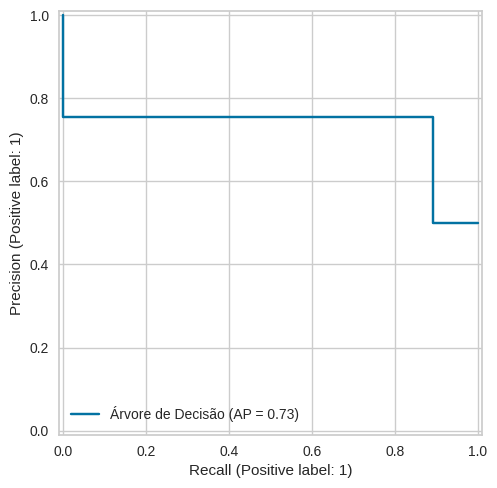

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_teste, y_previsto_RFC, name='Árvore de Decisão');

In [ ]:
from sklearn.metrics import average_precision_score
print(f'AP: {average_precision_score(y_teste, y_previsto)}')

AP: 0.729592608418937


###Resumo de Desempenho

####Modelo Árvore

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_teste, y_previsto))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1616
           1       0.77      0.84      0.81      1617

    accuracy                           0.80      3233
   macro avg       0.80      0.80      0.80      3233
weighted avg       0.80      0.80      0.80      3233



####Modelo RandomForestClassifier

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_teste, y_previsto_RFC))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      1616
           1       0.75      0.89      0.82      1617

    accuracy                           0.80      3233
   macro avg       0.81      0.80      0.80      3233
weighted avg       0.81      0.80      0.80      3233



###Geral

In [ ]:
import pandas as pd

# Métricas fornecidas para cada modelo
metricas = {
    "Métrica": [
        "Acurácia",
        "Recall ",
        "Precisão",
        "F1-Score",
        "AUC ROC",
        "AP (Precision x Recall)"
    ],
    "Árvore de Decisão": [
        0.7986,
        0.8472,
        0.7723,
        0.8080,
        0.80,
        0.7307
    ],
    "Random Forest": [
        0.8011,
        0.8918,
        0.7550,
        0.8177,
        0.80,
        0.7296
    ]
}

# Criar DataFrame
df_comparacao = pd.DataFrame(metricas)

# Definir a métrica como índice (opcional)
df_comparacao.set_index("Métrica", inplace=True)

# Exibir a matriz
print("\n🔍 Comparação de Métricas entre os Modelos:\n")
print(df_comparacao)


🔍 Comparação de Métricas entre os Modelos:

                         Árvore de Decisão  Random Forest
Métrica                                                  
Acurácia                            0.7986         0.8011
Recall                              0.8472         0.8918
Precisão                            0.7723         0.7550
F1-Score                            0.8080         0.8177
AUC ROC                             0.8000         0.8000
AP (Precision x Recall)             0.7307         0.7296


##Variáveis absolutas mais relevantes para os modelos

Modelo RFC

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



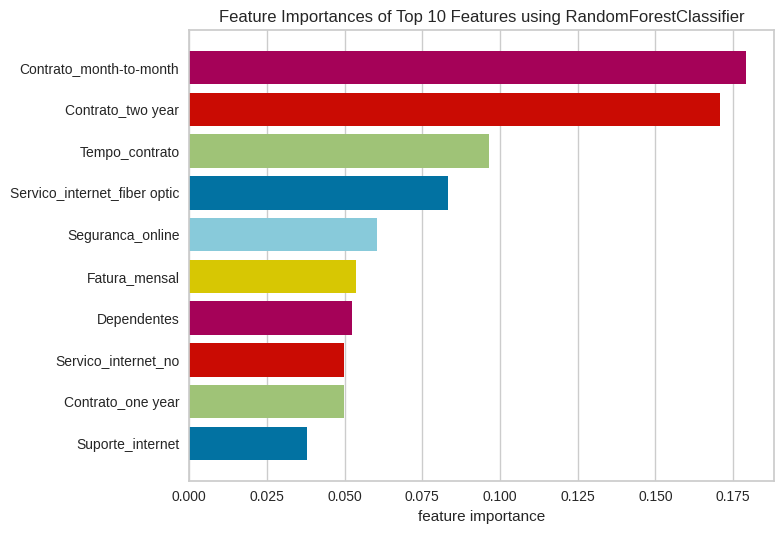

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [ ]:
#Verificar as variáveis absolutas mais relevantes para esse modelo:
from yellowbrick.model_selection import FeatureImportances

visualização_rfc = FeatureImportances(RFC, relative=False, topn=10)
visualização_rfc.fit(x,y)
visualização_rfc.show()

#Relatório Final

#🎯 1. Comparativo dos Modelos

Os modelos foram criados e as métricas foram analisadas conforme o comparativo abaixo:

##🔍Comparação de Métricas entre os Modelos:

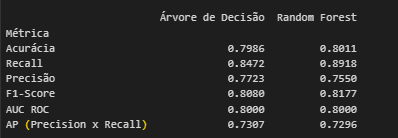


*   Acurácia

Mede a proporção de previsões corretas entre todas as previsões feitas.

De acordo com essa métrica, o melhor modelo foi o de Random Forest Classifier. Para confirmar que o modelo realmente tem um bom desempenho, outros parâmetros foram analisados.

*  Recall

Mede a proporção de dados positivos que foram corretamente identificados pelo modelo, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados positivos como negativos.

*  Precisão

Mede a proporção de dados classificados como positivos que são realmente positivos, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados negativos como positivos.

*   F1-Score

Fornece um equilíbrio entre o recall e a precisão, sendo útil quando as classes da variável alvo estão desbalanceadas, ou seja, quando há uma quantidade de dados muito diferente para cada classe.

O resultado 0.8177 é um bom F1-score, indicando que o modelo tem um bom equilíbrio entre precisão (evitar falsos positivos) e recall (evitar falsos negativos).

*   AUC ROC: 0.80

Mede a capacidade do modelo de distinguir entre as classes. Um valor de 1.0 indica separação perfeita entre classes, e 0.5 representa um modelo aleatório.

Isso significa que, em 80% das vezes, o modelo classifica corretamente uma instância positiva mais alto que uma negativa. Isso mostra boa discriminação entre as classes.

##Sobre a Matriz de confusão:

*  O Random Forest erra mais clientes que não iriam cancelar → mais falsos positivos

*  Em compensação, ele identifica melhor quem vai realmente cancelar → menos falsos negativos, o que é crucial em churn!

🎯 O modelo Random Forest Classifier além de ter indicadores levemente superiores, seria o que melhor atenderia ao problema.



#📋 2. Interpretação Estratégica dos Resultados

Com base nas variáveis mais relevantes do modelo RandomForestClassifier, foram listados os possíveis problemas e dicas de como mitigá-los.

##🔁 Contratos

Month-to-month: é o maior indicador de churn. Clientes nesse modelo são mais voláteis.

One year / Two year: reduzem significativamente o churn. Contratos longos criam vínculo.

➡ Estratégia: Incentivar contratos mais longos com bônus, descontos ou serviços premium gratuitos por tempo limitado.

⏳ Tempo de Contrato

Clientes com pouco tempo de contrato tem maior risco de churn.

➡ Estratégia: Criar um programa de acompanhamento mais próximo do cliente durante os primeiros meses.

##🌐 Tipo de Internet

Fiber optic aparece como associada ao maior churn — pode ser devido a problemas técnicos na infraestrutura.

➡ Estratégia: Monitorar qualidade e satisfação dos clientes desse perfil, colhendo feedbacks.

##🔐 Pacotes de serviços

Clientes com Segurança Online ativa tem menor probabilidade de churn. Mostra que serviços mais completos ajudam na retenção.

➡ Estratégia: Oferecer pacotes com descontos que contemplem serviços como segurança, backup, antivírus.
